Gerekli kütüphaneleri import ediyoruz

In [1668]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar100   #CIFAR veri setini import ediyoruz
from keras.preprocessing import image
from keras.utils import np_utils
from keras.optimizers import Adam

import pandas as pd
import numpy as np

---
<h1>CIFAR-100 veri setinden ilgili beş sınıfın çıkarılması:
</h1>


In [1669]:
#ilgili beş sınıfımızı kullanmak üzere bir sözlükte tanımlıyoruz
classes={4:"beaver", 32: "flatfish", 39: "keyboard",
         52: "oak_tree", 79: "spider"}

#CIFAR-100 veri setini "fine" granül biçimde belleğe yüklüyoruz. 
(x_train, y_train),(x_test, y_test) = cifar100.load_data(label_mode="fine")


In [1670]:
#alacağımız beş sınıf geçici değişkenler
x_train_= np.zeros(shape=(1, 32, 32, 3))#2500
x_test_= np.zeros(shape=(1, 32, 32, 3))#500

y_train_= np.zeros(shape=(1, 1))#2500
y_test_= np.zeros(shape=(1, 1))#500


In [1671]:
#5 sınıf çıkarılıp yeni değişkenelere aktarılyıor:
for label in classes:
    index = np.where(y_test==label)
    x_test_= np.append(x_test_, x_test[index[0]],axis=0).astype(np.uint8)
    y_test_=np.append(y_test_, index[1] + label).astype(np.uint8)
    
    index= np.where(y_train==label)
    x_train_= np.append(x_train_, x_train[index[0]],axis=0).astype(np.uint8)
    y_train_=np.append(y_train_, index[1] + label).astype(np.uint8)
    
#ilk eleman boş olduğu için siliniyor    
x_test=x_test_[1:]
y_test=y_test_[1:]
x_train=x_train_[1:]
y_train=y_train_[1:]


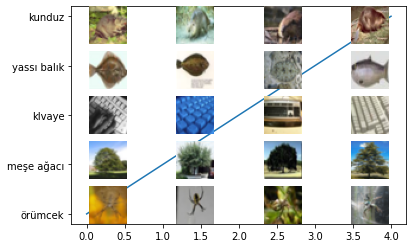

In [1672]:

#Veri görselleştirme

fig=plt.figure(1)    
#plt.plot( list(classes.values()),) sözlüğün keylere göre sıralanması gerek
plt.plot(["örümcek","meşe ağacı", "klvaye","yassı balık","kunduz"],)

#i -> [1-20]
for i in range(1,5 * 4+1):#"5" sınıf için "4" resim göster
    fig.add_subplot(5,4,i) 
    plt.imshow(x_test[i* 25-1])
    plt.axis('off')    


In [1673]:
#son olarak veri seti karılıyor:
from sklearn.utils import shuffle
x_test, y_test= shuffle(x_test, y_test)
x_train ,y_train= shuffle( x_train ,y_train)

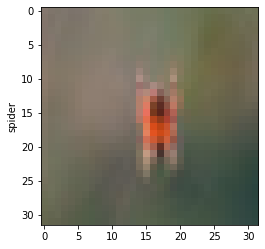

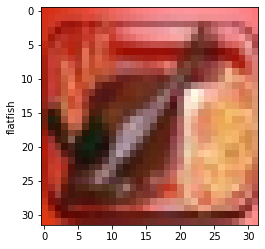

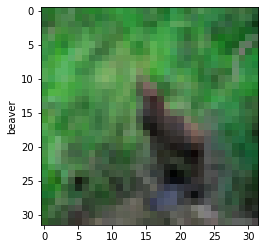

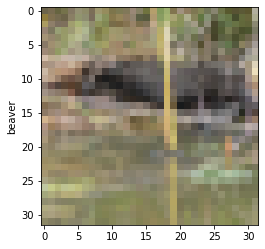

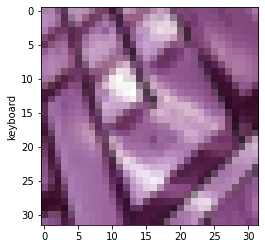

In [1674]:
#tekli görselleştirme
for i in range(50,55):
    plt.figure()
    plt.imshow(x_train[i])    
    plt.ylabel(classes[y_train[i]])
    plt.show()


---
<h1>Veri Ön Hazırlıkları
</h1>


In [1675]:
#biçimlendirme:
x_train = x_train.reshape(2500, 32, 32, 3).astype('float32')
x_test = x_test.reshape(500, 32, 32, 3).astype('float32')

#normalizasyon:
x_train/=255
x_test/=255

---
<h3>Etiket Kodlama(One Hot ile):
</h3>


In [1676]:
print('Eski etiket: ', y_train[0])
y_train= pd.get_dummies(y_train).to_numpy()
y_test= pd.get_dummies(y_test).to_numpy()
print('Yeni etiket( one-hot sonrası ) : ', y_train[0])

Eski etiket:  79
Yeni etiket( one-hot sonrası ) :  [0 0 0 0 1]


---
<h1>Modelin Oluşturulması:
</h1>


In [1677]:
net = Sequential()

net.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Dropout(0.25))

net.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Dropout(0.25))

net.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Dropout(0.25))


net.add(Flatten())

net.add(Dense(units=320, activation='relu'))
net.add(Dropout(0.5))
net.add(Dense(units=5, activation='softmax'))

net.compile(loss='categorical_crossentropy', optimizer=
             Adam(learning_rate=0.001), metrics=['accuracy'])
net.summary()


Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_340 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_318 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_424 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_341 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_319 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_425 (Dropout)        (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_342 (Conv2D)          (None, 8, 8, 128)      

---
<h1>Eğitim:

In [1678]:
#eğitim parametreleri
batch_size = 64
epochs = 35

#eğitim:
history = net.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))


Epoch 1/35
40/40 [==============================] - 1s 12ms/step - loss: 1.5172 - accuracy: 0.3107 - val_loss: 1.2538 - val_accuracy: 0.5000
Epoch 2/35
40/40 [==============================] - 0s 6ms/step - loss: 1.1778 - accuracy: 0.5062 - val_loss: 1.0636 - val_accuracy: 0.6180
Epoch 3/35
40/40 [==============================] - 0s 7ms/step - loss: 1.0961 - accuracy: 0.5580 - val_loss: 1.0128 - val_accuracy: 0.6080
Epoch 4/35
40/40 [==============================] - 0s 7ms/step - loss: 1.0451 - accuracy: 0.5816 - val_loss: 0.8908 - val_accuracy: 0.6800
Epoch 5/35
40/40 [==============================] - 0s 7ms/step - loss: 0.9253 - accuracy: 0.6409 - val_loss: 0.8559 - val_accuracy: 0.6660
Epoch 6/35
40/40 [==============================] - 0s 6ms/step - loss: 0.8958 - accuracy: 0.6489 - val_loss: 0.8605 - val_accuracy: 0.6780
Epoch 7/35
40/40 [==============================] - 0s 7ms/step - loss: 0.8445 - accuracy: 0.6676 - val_loss: 0.8171 - val_accuracy: 0.6740
Epoch 8/35
40/40 [=

In [1679]:
net.evaluate(x_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.8360


[0.4577687978744507, 0.8360000252723694]

---
<h1> Değerlendirme:

In [1680]:
#yardımcı grafik fonksiyonlar:

#EĞİTİM-HATA GRAFİĞİ
def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Eğitim acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Geçerleme acc')
    plt.title ('Eğitim ve Geçerleme doğrulukları(accuracy)')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Eğitim kaybı' )
    plt.plot  ( epochs, val_loss ,  'b', label='Geçerleme kaybı' )
    plt.title ('Eğitim ve Geçerleme kaybı')
    plt.ylabel('kayıp')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

#KARMAŞIKLIK MATRİSİ:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Karmaşıklık Matrisi',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.tight_layout()
    plt.ylabel('Gerçek Etiket')
    plt.xlabel('Tahmin')

In [1681]:
net.evaluate(x_test, y_test)

16/16 [==============================] - 0s 4ms/step - loss: 0.4578 - accuracy: 0.8360


[0.4577687978744507, 0.8360000252723694]

In [1682]:
net.save('cifar-5-class.h5')

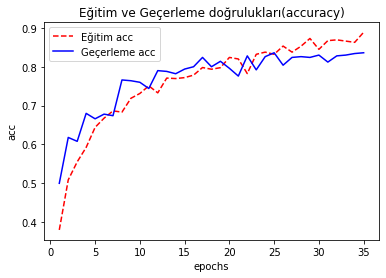

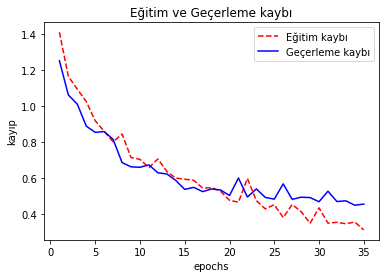

<Figure size 432x288 with 0 Axes>

In [1683]:
#eğitim hata grafikleri
plot_history(history)

array([[77,  8,  9,  3,  3],
       [ 9, 73, 11,  2,  5],
       [ 4,  7, 87,  0,  2],
       [ 1,  0,  0, 98,  1],
       [ 5,  6,  3,  3, 83]])

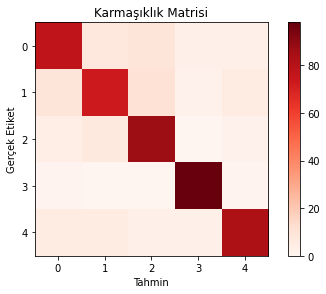

In [1684]:
#karmaşıklık matrisi ve görselleştirme
Y_pred = net.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
confusion_mtx = confusion_matrix(np.argmax(y_test,axis=1), Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(100))

confusion_mtx

---
<h1> Tekli Test

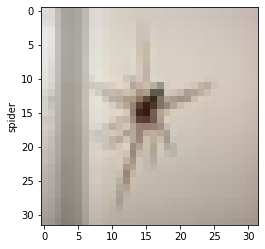

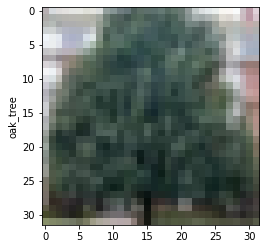

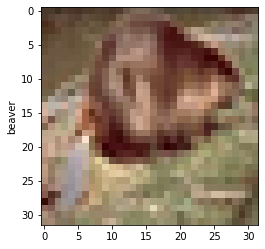

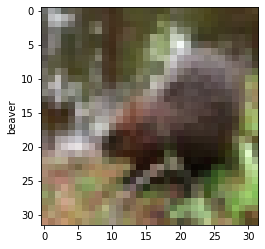

In [1685]:
test_veriler=x_test[33:37]

for veri in test_veriler:#i bir resim
    #tekli tahmin
    tahmin=net.predict(np.expand_dims(veri,axis=0))    
    tahmin_sinif=np.argmax(tahmin, axis = 1) 
    
    plt.figure()
    plt.imshow(veri)    
    plt.ylabel(classes[list(classes)[tahmin_sinif[0]]] )#get_dummies sınıf idleri küçükten büyüğe 0 1 2 3 4 olarka kodluyor çünkü

    plt.show()


---
<h4> Model Görselleştirmesi

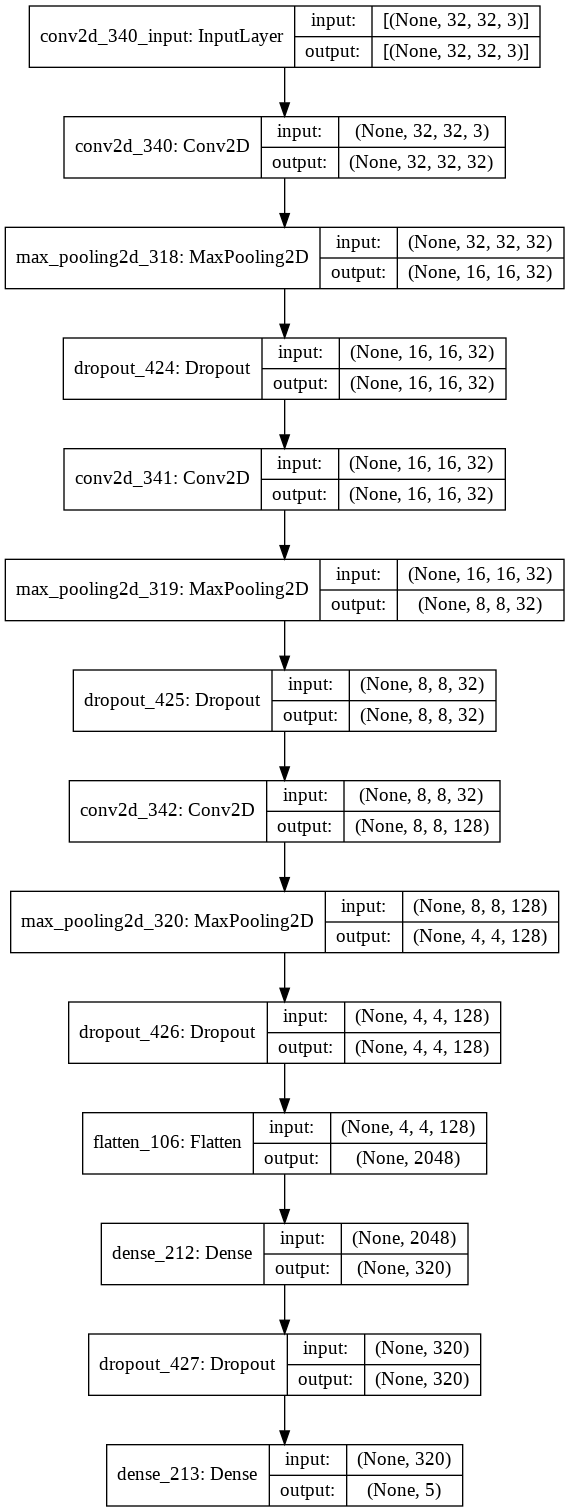

In [1686]:
from keras.utils.vis_utils import plot_model
plot_model(net, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [1687]:
!pip install visualkeras

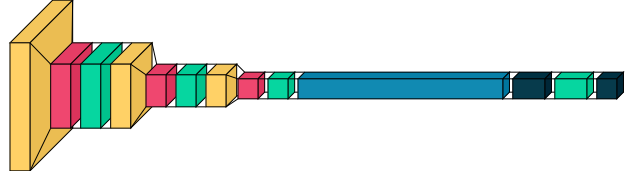

In [1688]:
import visualkeras
visualkeras.layered_view(net, to_file='output.png') # write to disk
